To-Do:
* category [list]
* attribute 
    * transform 'attribute' to col
    * threshold (value/proportion) -> missing value
* hours

In [1]:
import seaborn
import pandas as pd
import pylab as pl
import yaml
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_pickle("../yelp-challenge/data_urbana_champaign/business_urbana_champaign.p")
df.reset_index(drop=True, inplace=True)
print df.shape
print df.columns.values
len(df.business_id.unique())

(1556, 16)
[u'address' u'attributes' u'business_id' u'categories' u'city' u'hours'
 u'is_open' u'latitude' u'longitude' u'name' u'neighborhood' u'postal_code'
 u'review_count' u'stars' u'state' u'type']


1556

### geo: u'address', u'latitude',  u'longitude'
No None geo-data <br/>
No None name

In [3]:
df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
0,2501 Fields S Dr,[BusinessAcceptsCreditCards: True],J3EckozG83hEvm267MOeHQ,"[Community Service/Non-Profit, Local Services]",Champaign,"[Monday 5:0-22:0, Tuesday 5:0-22:0, Wednesday ...",1,40.081839,-88.308425,YMCA,,61820,7,3.5,IL,business
1,44 E Main St,None,3dzPclva9uHp-22TbheqlA,"[Trainers, Pilates, Active Life, Fitness & Ins...",Champaign,None,1,40.117598,-88.241400,Dulak Pilates Center,,61820,4,5.0,IL,business


## 1. 'city'

In [4]:
print df.city.unique(), '\n', len(df.city.unique())

[u'Champaign' u'Tuscola' u'Urbana' u'Monticello' u'Savoy' u'Mahomet'
 u'St Joseph' u'Rantoul' u'Philo' u'Tolono' u'Villa Grove' u'Broadlands'
 u'Saint Joseph' u'Gifford' u'Dewey' u'Mansfield' u'Ogden' u'Fithian'
 u'Elk Grove Villa' u'Sidney' u'Homer' u'St. Joseph'] 
22


In [28]:
city_count = df.city.groupby(df.city).apply(lambda x:x.count())
uc_sum = city_count[city_count.keys().isin(['Champaign', 'Urbana'])].sum()
100.0 * uc_sum / city_count.sum()

87.01799485861183

we only consider Champaign and Urbana as our target in this dataset

In [3]:
df_uc = df[df.city.isin(['Champaign', 'Urbana'])]
df_uc.shape

(1354, 16)

## 2. 'is_open'

In [33]:
print "{}% ({}/{}) business_id(s) are open".format(100.0 * sum(df_uc.is_open == 1) / len(df_uc), sum(df_uc.is_open == 1), len(df_uc))

82.0531757755% (1111/1354) business_id(s) are open


we only consider those with is_open == 1

In [11]:
df_uc_open = df_uc[df_uc.is_open == 1]
df_uc_open.reset_index(drop=True, inplace=True)
df_uc_open.shape

(1111, 16)

## 3. 'Hour'

In [112]:
100.0 * df_uc_open.hours.dropna().shape[0] / df_uc_open.shape[0]

73.26732673267327

Drop all records with missing 'Hour'

In [12]:
df_uc_open = df_uc_open.dropna(subset=['hours'])
df_uc_open.reset_index(drop=True, inplace=True)
df_uc_open.shape

(814, 16)

## 4. 'postal_code'

In [116]:
len(df_uc_open.postal_code.unique())

8

## 5. 'review_count'

In [117]:
df.review_count.describe()

count    1556.000000
mean       19.199229
std        37.116487
min         3.000000
25%         4.000000
50%         8.000000
75%        19.000000
max       697.000000
Name: review_count, dtype: float64

In [118]:
df_uc_open.review_count.describe()

count    814.000000
mean      26.356265
std       48.775645
min        3.000000
25%        5.000000
50%       10.000000
75%       27.000000
max      697.000000
Name: review_count, dtype: float64

In [119]:
df_uc_open.ix[df_uc_open.review_count.argmax()]

address                                        201 N Broadway Ave
attributes      [Alcohol: full_bar, Ambience: {'romantic': Fal...
business_id                                9MnbQg7kfb_WgxoV0hXKSQ
categories                                [Barbeque, Restaurants]
city                                                       Urbana
hours           [Monday 11:0-22:0, Tuesday 11:0-22:0, Wednesda...
is_open                                                         1
latitude                                                  40.1138
longitude                                                -88.2077
name                                  Black Dog Smoke & Ale House
neighborhood                                                     
postal_code                                                 61801
review_count                                                  697
stars                                                         4.5
state                                                          IL
type      

## 6. 'categories'

In [121]:
cat = {}
none_num = 0
for i in df_uc_open.categories:
    if not i:
        none_num += 1
        continue
    for j in i:
        cat[j] = cat.get(j,0) + 1

In [122]:
none_num

0

In [123]:
sorted(cat.iteritems(), key=lambda x: x[1], reverse=True)

[(u'Restaurants', 256),
 (u'Shopping', 177),
 (u'Food', 125),
 (u'Home Services', 98),
 (u'Beauty & Spas', 87),
 (u'Local Services', 72),
 (u'Automotive', 68),
 (u'Nightlife', 63),
 (u'Event Planning & Services', 55),
 (u'Home & Garden', 54),
 (u'Bars', 54),
 (u'Auto Repair', 50),
 (u'Fashion', 40),
 (u'American (Traditional)', 38),
 (u'Hotels & Travel', 36),
 (u'Real Estate', 35),
 (u'Hair Salons', 35),
 (u'Sandwiches', 34),
 (u'Fast Food', 34),
 (u'Health & Medical', 33),
 (u'Chinese', 29),
 (u'Pizza', 29),
 (u'Mexican', 28),
 (u'Apartments', 27),
 (u'Active Life', 26),
 (u'American (New)', 25),
 (u'Nail Salons', 22),
 (u'Coffee & Tea', 22),
 (u'Contractors', 22),
 (u'Furniture Stores', 22),
 (u'Breakfast & Brunch', 22),
 (u'Pets', 22),
 (u'Bakeries', 22),
 (u'Specialty Food', 21),
 (u'Home Decor', 20),
 (u'Tires', 20),
 (u'Burgers', 19),
 (u'Hotels', 19),
 (u'Grocery', 18),
 (u'Pet Services', 18),
 (u'Auto Parts & Supplies', 17),
 (u'Professional Services', 17),
 (u'Arts & Entertain

Here we should set the list of categories we are interested.

## 7. 'Neighborhood'

In [124]:
df_uc_open.neighborhood.unique()

array([u''], dtype=object)

All 'Neighborhood' == None

## 8. 'Attribute'

First of all, remove records with None 'Attribute'

In [13]:
df_uc_open = df_uc_open.dropna(subset=['attributes'])
df_uc_open.reset_index(drop=True, inplace=True)
df_uc_open.shape
# 814 -> ?

(729, 16)

In [204]:
# df_uc_open.attributes
# import yaml

In [202]:
att_count = {}
for i in df_uc_open.attributes:
    data = yaml.load('['+','.join(i)+']')
    for d in data:
        att_count[d.keys()[0]] = att_count.get(d.keys()[0], 0) + 1

In [203]:
sorted(att_count.iteritems(), key=lambda x: x[1], reverse=True)

[('BusinessAcceptsCreditCards', 690),
 ('RestaurantsPriceRange2', 553),
 ('BusinessParking', 507),
 ('BikeParking', 454),
 ('WheelchairAccessible', 329),
 ('GoodForKids', 300),
 ('RestaurantsTakeOut', 292),
 ('OutdoorSeating', 274),
 ('RestaurantsGoodForGroups', 264),
 ('RestaurantsDelivery', 261),
 ('Alcohol', 257),
 ('RestaurantsReservations', 255),
 ('WiFi', 253),
 ('HasTV', 252),
 ('Ambience', 250),
 ('NoiseLevel', 242),
 ('RestaurantsAttire', 240),
 ('GoodForMeal', 240),
 ('RestaurantsTableService', 223),
 ('Caters', 202),
 ('ByAppointmentOnly', 169),
 ('BusinessAcceptsBitcoin', 68),
 ('GoodForDancing', 57),
 ('DogsAllowed', 56),
 ('CoatCheck', 55),
 ('HappyHour', 54),
 ('Music', 52),
 ('Smoking', 49),
 ('BestNights', 46),
 ('BYOBCorkage', 39),
 ('DriveThru', 35),
 ('BYOB', 31),
 ('AcceptsInsurance', 22),
 ('Corkage', 19),
 ('RestaurantsCounterService', 12),
 ('HairSpecializesIn', 10),
 ('Open24Hours', 3),
 ('AgesAllowed', 3),
 ('DietaryRestrictions', 2)]

In [207]:
df_uc_open.shape[0]

729

We need a threshold to decide which attributes we use to build model.

In [212]:
data = yaml.load('['+','.join(df_uc_open.attributes[452])+']')
data

[{'Alcohol': 'full_bar'},
 {'Ambience': {'casual': False,
   'classy': False,
   'divey': False,
   'hipster': False,
   'intimate': False,
   'romantic': False,
   'touristy': False,
   'trendy': False,
   'upscale': False}},
 {'BusinessAcceptsCreditCards': True},
 {'NoiseLevel': 'average'},
 {'RestaurantsAttire': 'dressy'},
 {'RestaurantsGoodForGroups': True},
 {'RestaurantsPriceRange2': 3},
 {'RestaurantsReservations': True},
 {'RestaurantsTableService': True},
 {'BikeParking': True},
 {'GoodForKids': False},
 {'OutdoorSeating': True},
 {'BusinessParking': {'garage': False,
   'lot': False,
   'street': True,
   'valet': False,
   'validated': False}},
 {'HasTV': True},
 {'RestaurantsTakeOut': True},
 {'RestaurantsDelivery': True},
 {'Caters': True},
 {'WheelchairAccessible': True},
 {'WiFi': 'free'},
 {'GoodForMeal': {'breakfast': False,
   'brunch': False,
   'dessert': False,
   'dinner': True,
   'latenight': False,
   'lunch': False}},
 {'BestNights': {'friday': False,
   'mond

There are 2 kinds of attributes:
    * Binary 
        * 0 or 1
        * True or False
    * Multiple
        * dict eg. 'GoodForMeal'
            * if ALL False, ?
            * if more than ONE True, ? eg. 'BestNights'
        * multi-value eg. 'RestaurantsPriceRange2' 1,2,3... or 'Alcohol'
    * Anything Else
    
    
    * How to deal with missing values?

## 9. 'Stars'

(array([  12.,   19.,   32.,   55.,    0.,  127.,  162.,  138.,   94.,   90.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

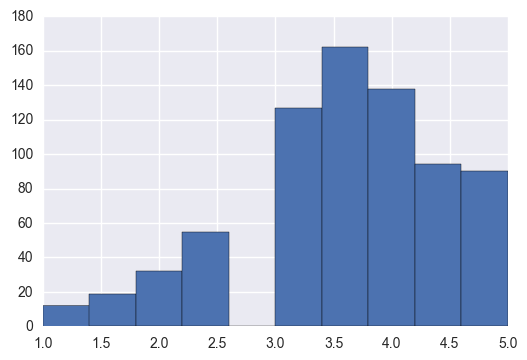

In [252]:
pl.hist(df_uc_open.stars)

In [228]:
df_uc_open.stars.describe()

count    729.000000
mean       3.587106
std        0.934106
min        1.000000
25%        3.000000
50%        3.500000
75%        4.500000
max        5.000000
Name: stars, dtype: float64

In [242]:
s = 3.9
1.0 * sum(df_uc_open.stars > s) / 729

0.44170096021947874

If we would like to build a binary classification model, here we could set threshold 'star' as '<4.0'

In [241]:
df_uc_open.stars.value_counts() /729

3.5    0.222222
4.0    0.189300
3.0    0.174211
4.5    0.128944
5.0    0.123457
2.5    0.075446
2.0    0.043896
1.5    0.026063
1.0    0.016461
Name: stars, dtype: float64

In [275]:
pl.hist?

Champaign 
count    559.000000
mean       3.567084
std        0.943507
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: stars, dtype: float64


(array([ 0.04472272,  0.07155635,  0.1118068 ,  0.18783542,  0.        ,
         0.45169946,  0.5411449 ,  0.48300537,  0.29964222,  0.30858676]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

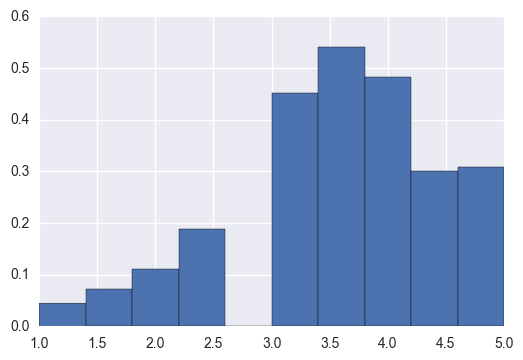

In [276]:
c = ['Champaign', 'Urbana']
print c[0], '\n',df_uc_open[df_uc_open.city == c[0]].stars.describe()
pl.hist(df_uc_open[df_uc_open.city == c[0]].stars, normed=True)

Urbana 
count    170.000000
mean       3.652941
std        0.902080
min        1.000000
25%        3.000000
50%        3.500000
75%        4.500000
max        5.000000
Name: stars, dtype: float64


(array([ 0.02941176,  0.04411765,  0.10294118,  0.19117647,  0.        ,
         0.38235294,  0.60294118,  0.44117647,  0.39705882,  0.30882353]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

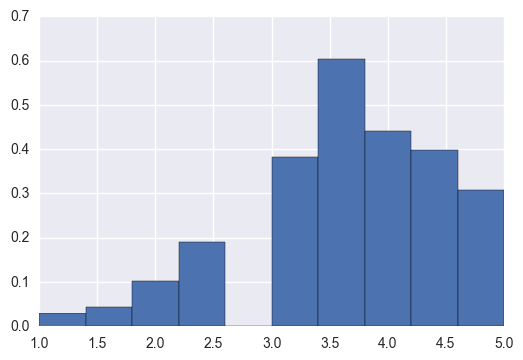

In [277]:
print c[1], '\n',df_uc_open[df_uc_open.city == c[1]].stars.describe()
pl.hist(df_uc_open[df_uc_open.city == c[1]].stars, normed=True)

### output df_uc_open 

In [253]:
print df.shape, df_uc.shape, df_uc_open.shape

(1556, 16) (1354, 16) (729, 16)


In [15]:
df_uc_open.to_pickle("UC01_df_uc_open.p")